<a href="https://colab.research.google.com/github/JefNtungila/Brunel/blob/main/CS5810_Analysis_of_Twitter_Discourse_on_Brunel_University_Using_Python_and_Hadoop_MapReduce_2046825.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analysis of Twitter Discourse on Brunel University Using Python and Hadoop MapReduce

## Hadoop Introduction
Hadoop is a Java-based programming framework that supports the processing and storage of extremely large datasets on a cluster of inexpensive machines. It was the first major open source project in the big data playing field and is sponsored by the Apache Software Foundation.

## Installing Hadoop

In [1]:
!wget https://downloads.apache.org/hadoop/common/hadoop-3.3.0/hadoop-3.3.0.tar.gz


--2021-07-29 15:52:08--  https://downloads.apache.org/hadoop/common/hadoop-3.3.0/hadoop-3.3.0.tar.gz
Resolving downloads.apache.org (downloads.apache.org)... 135.181.214.104, 135.181.209.10, 88.99.95.219, ...
Connecting to downloads.apache.org (downloads.apache.org)|135.181.214.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 500749234 (478M) [application/x-gzip]
Saving to: ‘hadoop-3.3.0.tar.gz’

hadoop-3.3.0.tar.gz 100%[===================>] 477.55M  28.9MB/s    in 17s     

2021-07-29 15:52:26 (27.5 MB/s) - ‘hadoop-3.3.0.tar.gz’ saved [500749234/500749234]



The tar command is usedwith the -x flag to extract, -z to uncompress, -v for verbose output, and -f to specify that we’re extracting from a file

In [2]:
!tar -xzvf hadoop-3.3.0.tar.gz

Streaming output truncated to the last 5000 lines.
hadoop-3.3.0/share/doc/hadoop/hadoop-project-dist/hadoop-common/build/source/hadoop-common-project/hadoop-common/target/api/org/apache/hadoop/fs/FSDataOutputStream.html
hadoop-3.3.0/share/doc/hadoop/hadoop-project-dist/hadoop-common/build/source/hadoop-common-project/hadoop-common/target/api/org/apache/hadoop/fs/TrashPolicyDefault.Emptier.html
hadoop-3.3.0/share/doc/hadoop/hadoop-project-dist/hadoop-common/build/source/hadoop-common-project/hadoop-common/target/api/org/apache/hadoop/fs/HarFileSystem.html
hadoop-3.3.0/share/doc/hadoop/hadoop-project-dist/hadoop-common/build/source/hadoop-common-project/hadoop-common/target/api/org/apache/hadoop/fs/PathExistsException.html
hadoop-3.3.0/share/doc/hadoop/hadoop-project-dist/hadoop-common/build/source/hadoop-common-project/hadoop-common/target/api/org/apache/hadoop/fs/XAttrSetFlag.html
hadoop-3.3.0/share/doc/hadoop/hadoop-project-dist/hadoop-common/build/source/hadoop-common-project/hadoop-

In [3]:
#copy  hadoop file to user/local
!cp -r hadoop-3.3.0/ /usr/local/

## Configuring Hadoop’s Java Home
Hadoop requires that you set the path to Java, either as an environment variable or in the Hadoop configuration file.

In [4]:
#To find the default Java path
#update JAVA_HOME on line 37

!readlink -f /usr/bin/java | sed "s:bin/java::"

/usr/lib/jvm/java-11-openjdk-amd64/


To set java path, go to /usr/local/hadoop-3.3.0/etc/hadoop/hadoop-env.sh then

. . .
export JAVA_HOME=/usr/lib/jvm/java-11-openjdk-amd64/
 . . . 

## Running Hadoop

In [5]:
#Running Hadoop
!/usr/local/hadoop-3.3.0/bin/hadoop

Usage: hadoop [OPTIONS] SUBCOMMAND [SUBCOMMAND OPTIONS]
 or    hadoop [OPTIONS] CLASSNAME [CLASSNAME OPTIONS]
  where CLASSNAME is a user-provided Java class

  OPTIONS is none or any of:

buildpaths                       attempt to add class files from build tree
--config dir                     Hadoop config directory
--debug                          turn on shell script debug mode
--help                           usage information
hostnames list[,of,host,names]   hosts to use in slave mode
hosts filename                   list of hosts to use in slave mode
loglevel level                   set the log4j level for this command
workers                          turn on worker mode

  SUBCOMMAND is one of:


    Admin Commands:

daemonlog     get/set the log level for each daemon

    Client Commands:

archive       create a Hadoop archive
checknative   check native Hadoop and compression libraries availability
classpath     prints the class path needed to get the Hadoop jar and the
    

In [6]:
!mkdir ~/input
!cp /usr/local/hadoop-3.3.0/etc/hadoop/*.xml ~/input

In [7]:
!ls ~/input

capacity-scheduler.xml	hdfs-rbf-site.xml  kms-acls.xml     yarn-site.xml
core-site.xml		hdfs-site.xml	   kms-site.xml
hadoop-policy.xml	httpfs-site.xml    mapred-site.xml


In [8]:
!cat ~/grep_example/*

cat: '/root/grep_example/*': No such file or directory


## Hadoop Map Reduce Application

In [9]:
!wget https://raw.githubusercontent.com/JefNtungila/Brunel/main/brunel_university.txt

--2021-07-29 15:55:22--  https://raw.githubusercontent.com/JefNtungila/Brunel/main/brunel_university.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10773 (11K) [text/plain]
Saving to: ‘brunel_university.txt’

brunel_university.t 100%[===================>]  10.52K  --.-KB/s    in 0s      

2021-07-29 15:55:23 (55.9 MB/s) - ‘brunel_university.txt’ saved [10773/10773]



In [11]:
!wget https://raw.githubusercontent.com/JefNtungila/Brunel/main/mapper.py

--2021-07-29 15:56:40--  https://raw.githubusercontent.com/JefNtungila/Brunel/main/mapper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 765 [text/plain]
Saving to: ‘mapper.py’

mapper.py           100%[===================>]     765  --.-KB/s    in 0s      

2021-07-29 15:56:40 (31.3 MB/s) - ‘mapper.py’ saved [765/765]



In [12]:
!wget https://raw.githubusercontent.com/JefNtungila/Brunel/main/reducer.py

--2021-07-29 15:56:57--  https://raw.githubusercontent.com/JefNtungila/Brunel/main/reducer.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1135 (1.1K) [text/plain]
Saving to: ‘reducer.py’

reducer.py          100%[===================>]   1.11K  --.-KB/s    in 0s      

2021-07-29 15:56:57 (72.1 MB/s) - ‘reducer.py’ saved [1135/1135]



In [13]:
!find / -name 'hadoop-streaming*.jar'

/usr/local/hadoop-3.3.0/share/hadoop/tools/lib/hadoop-streaming-3.3.0.jar
/usr/local/hadoop-3.3.0/share/hadoop/tools/sources/hadoop-streaming-3.3.0-sources.jar
/usr/local/hadoop-3.3.0/share/hadoop/tools/sources/hadoop-streaming-3.3.0-test-sources.jar
/content/hadoop-3.3.0/share/hadoop/tools/lib/hadoop-streaming-3.3.0.jar
/content/hadoop-3.3.0/share/hadoop/tools/sources/hadoop-streaming-3.3.0-sources.jar
/content/hadoop-3.3.0/share/hadoop/tools/sources/hadoop-streaming-3.3.0-test-sources.jar


In [14]:
!chmod u+rwx /content/mapper.py
!chmod u+rwx /content/reducer.py

In [15]:
!/usr/local/hadoop-3.3.0/bin/hadoop jar /usr/local/hadoop-3.3.0/share/hadoop/tools/lib/hadoop-streaming-3.3.0.jar -input /content/brunel_university.txt -output /content/output -file /content/mapper.py  -file /content/reducer.py  -mapper 'python mapper.py'  -reducer 'python reducer.py'

2021-07-29 15:59:14,702 WARN streaming.StreamJob: -file option is deprecated, please use generic option -files instead.
packageJobJar: [/content/mapper.py, /content/reducer.py] [] /tmp/streamjob9495052457161533125.jar tmpDir=null
2021-07-29 15:59:15,599 INFO impl.MetricsConfig: Loaded properties from hadoop-metrics2.properties
2021-07-29 15:59:15,849 INFO impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).
2021-07-29 15:59:15,849 INFO impl.MetricsSystemImpl: JobTracker metrics system started
2021-07-29 15:59:15,873 WARN impl.MetricsSystemImpl: JobTracker metrics system already initialized!
2021-07-29 15:59:16,102 INFO mapred.FileInputFormat: Total input files to process : 1
2021-07-29 15:59:16,131 INFO mapreduce.JobSubmitter: number of splits:1
2021-07-29 15:59:16,551 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_local1125904569_0001
2021-07-29 15:59:16,551 INFO mapreduce.JobSubmitter: Executing with tokens: []
2021-07-29 15:59:16,914 INFO mapred.Loc

In [16]:
!ls /content/output

part-00000  _SUCCESS


In [17]:
!cat /content/output/part-00000

01810114991	1
1	1
11pm	1
1276	1
12noon	1
17101982	1
1800pm	1
1830	2
1845pm	1
19	1
1971	1
199899	1
2008	1
2010	1
20170504	2
24081983	1
25	1
28th	2
3	1
321	1
3ph	1
3pm	1
712	1
82	1
83	1
9k	1
academy	1
accepted	1
achieve	1
actually	1
add	1
address	1
adopting	1
adopts	4
african	2
aids	1
aijazi	1
alexandra	1
algerian	1
amazing	2
american	1
among	1
amp	1
analysis	1
anderson	1
anthony	1
anti	1
antisemitism	9
anyone	1
apply	1
april	2
architecture	1
archives	1
ask	1
asking	1
assessment	2
assessmentwritingservice	2
assessor	1
asset	1
assignment	2
assignmenthelp	2
assistantresearch	1
association	1
available	5
axon	1
back	1
baskets	1
bathspageog	1
bbc	1
begin	1
behaviour	1
benjamin	3
berenice	1
betrayalâ	1
betterpakistan	1
big	1
bioinformatics	1
black	1
blocks	1
book	1
breaking	1
bricks	4
brilliant	1
bring	1
bristol	1
britainâ	1
broadcast	1
broadcasted	1
brookes	1
bru	1
brunel	43
brunelbusinessschool	1
brunelforbusiness	1
bruneluni	4
bruneluniversity	2
brutalist	1
bsc	1
building	4
buildings	1
burn

## Word Cloud of Tweets about Brunel Univeristy

In [3]:
pip install tweet-preprocessor

In [8]:
import pandas as pd

pd.options.display.max_colwidth = 500

In [1]:
import regex as re

def tokenise(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    tokens = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    tokens = tokens.lower().split()
    return tokens

In [4]:
from wordcloud import WordCloud
import preprocessor as p
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from PIL import Image
import numpy as np
import random

df = pd.read_csv('https://raw.githubusercontent.com/JefNtungila/Brunel/main/brunel_university.csv')

#cleaning tweets to remove urls etc
df['clean_text'] = df['text'].apply(lambda x: p.clean(x))
df['tokenised_text'] = df['clean_text'].apply(lambda x: tokenise(x))

text = df['clean_text']

In [12]:
df['clean_text']

0                                Hi Mukhtar Course details can be viewed at ....To be considered for direct entry students who have studied in Nigeria are usually req'd to achieve a Diploma (from a Federal University) or a National Diploma.You should apply online via UCAS . com .....
1                                                        One week to go! April th, pm "Disasters as BetrayalOmer Aijazi (Brunel University London)will bring us to the mountainscapes of Northern Pakistan: What constitutes a disastrous event and who names it? Book your free place here:
2                                                                                                                                          Good morning! Join us at midday today to discover the amazing services such as , designed to help your business grow and succeed!Register now at:
3                                                                                                                                                

In [61]:
#creating word counter

word_cnt = {}

for docs in df['tokenised_text']: #looping through the docs where comments were given
    for token in docs: #looping through the tokens
      if token not in word_cnt:
        # if len(token) > 3:
        word_cnt[token] = 1
      else:
          word_cnt[token] += 1

 #have to use key,value pairs because dataframe method requires a dictionary of lists

word_cnt_df = pd.DataFrame({'word': [k for k in word_cnt.keys()], 'cnt': [v for v in word_cnt.values()]})
len(word_cnt_df)

528

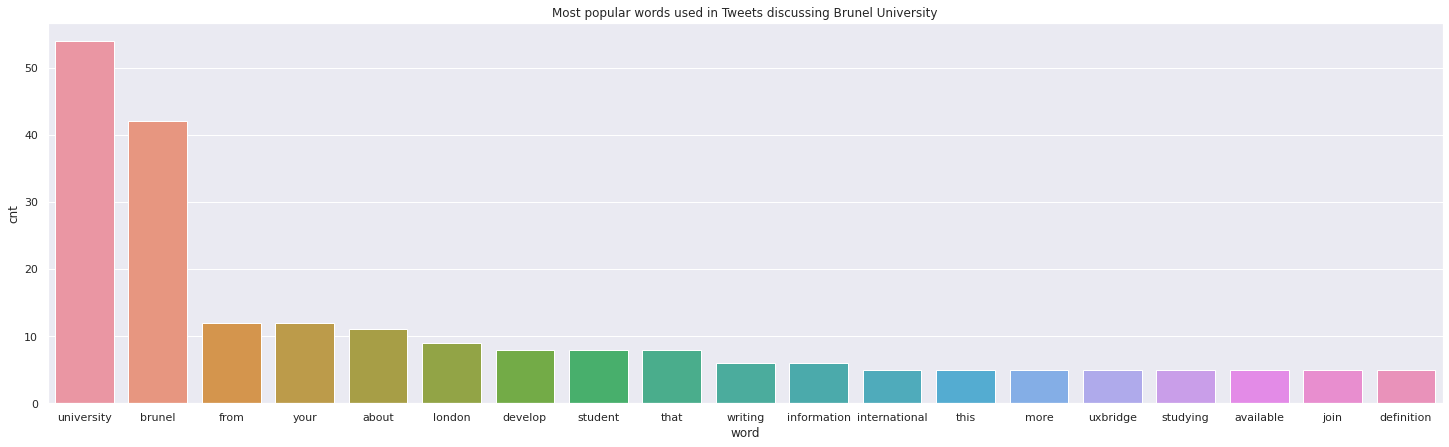

In [45]:
import seaborn as sns

#plotting top words that appear more than 200 times in the data

top_words = word_cnt_df[word_cnt_df['cnt'] > 4].sort_values(by='cnt', ascending=False)
sns.set(rc={'figure.figsize':(25,7)})
ax = sns.barplot(x = 'word', y='cnt', data = top_words).set(title='Most popular words used in Tweets discussing Brunel University')

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [64]:
df.head()

,Unnamed: 0,text,author_id,created_at,id
0,0,@MukhtarAdeshyna Hi Mukhtar :-) Course details...,701096582,2021-04-21T07:52:36.000Z,1384777072871149569
1,1,"One week to go! April 28th, 3pm \n@BathSpaGeog...",173199311,2021-04-21T07:43:07.000Z,1384774686530277379
2,2,Good morning! Join us at midday today to disco...,87157217,2021-04-21T07:10:02.000Z,1384766358722945025
3,0,Brunel University London: Senior Student Commu...,25322072,2021-04-21T10:59:04.000Z,1384823997850812416
4,1,Senior Student Communications Manager - Londo...,1911206232,2021-04-21T10:55:18.000Z,1384823050181435393


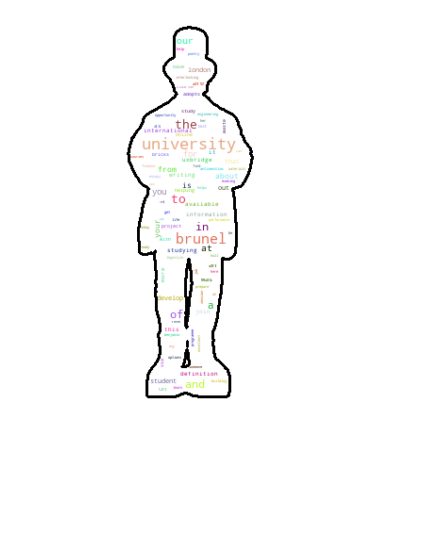

In [102]:

#cleaning tweets to remove urls etc
text = df['clean_text'].tolist() + df['clean_text'].tolist() 

mask = np.array(Image.open('/content/drive/MyDrive/brunel.png'))

wordcloud = WordCloud(mask=mask,width=mask.shape[1],
               height=mask.shape[0], background_color='white', contour_color='black',
               contour_width=3, 
               #colour funtion using random functions 
               color_func=lambda *args, **kwargs: (random.randint(0,250),random.randint(0,250),random.randint(0,250)),
               #seed for scientific replicability of results
               #using count to produce word cloud based on occurence
                 min_font_size=4, random_state=42).generate_from_frequencies(word_cnt)

#setting figure shape
figure(figsize=(15, 10))


#producing plot
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Sentiment Analysis of Tweets about Brunel University

In [ ]:
!pip install vaderSentiment

     |████████████████████████████████| 133kB 18.2MB/s 


In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
pd.options.display.max_colwidth = 100

def sentiment_analyser(x):

  sid = SentimentIntensityAnalyzer()

  output = sid.polarity_scores(x)

  return output


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
df['sentiment'] = df['text'].apply(lambda x: sentiment_analyser(x))
df['final_sentiment'] = df['sentiment'].apply(lambda x: x['compound'])

In [ ]:
#mostly neutral tweets but with a slight tendency towards positivity

df['final_sentiment'].mean()

0.2652037735849056